In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

##  Reading a text-based dataset into pandas

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_table(url, header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# shape of dataframe
print('Shape of data',df.shape)

Shape of data (5572, 2)


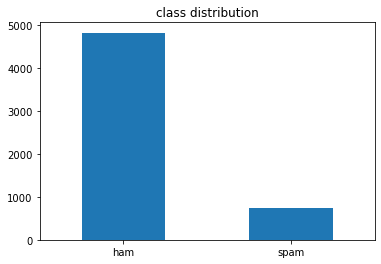

In [4]:
# examine the class distribution
df['label'].value_counts().plot(kind='bar')
plt.title('class distribution')
plt.xticks(rotation='horizontal')
plt.show()

## Preprocessing

In [5]:
# convert label to a numerical variable
df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Features and target variables

In [6]:
# define X and y (from the SMS data)
X = df.loc[:,['message']]
# define X  (from the SMS data) for use with COUNTVECTORIZER
X_ = df['message']
y = df['label']

In [7]:
print('Shape of Features',X.shape)
print('Shape of Features for use with COUNTVECTORIZER',X_.shape)
print('Shape of Features',y.shape)

Shape of Features (5572, 1)
Shape of Features for use with COUNTVECTORIZER (5572,)
Shape of Features (5572,)


## Train - Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

print('Shape of training features',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing features',X_test.shape)
print('Shape of testing labels', y_test.shape)

Shape of training features (4457,)
Shape of training labels (4457,)
Shape of testing features (1115,)
Shape of testing labels (1115,)


##  Vectorizing our dataset

In [9]:
vectorizer = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vectorizer.fit_transform(X_train)
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vectorizer.transform(X_test)

## Building and evaluating a model

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.



In [10]:
# instantiate multinomial Naive Bayes classifier 
mnb = MultinomialNB()
# train
mnb.fit(X_train_dtm, y_train)
# score
mnb.score(X_test_dtm, y_test)

0.9919282511210762

In [11]:
# instantiate logistic regression classifier 
log_reg = LogisticRegression()
# train
log_reg.fit(X_train_dtm, y_train)
# score
log_reg.score(X_test_dtm, y_test)

0.9883408071748879

## Predictions

In [12]:
y_preds = mnb.predict(X_test_dtm)

In [14]:
acc = accuracy_score(y_test, y_preds)
print('Accuracy score',acc)

Accuracy score 0.9919282511210762


In [17]:
# confusion matrix
print('Confusion matrix \n',confusion_matrix(y_test, y_preds))

Confusion matrix 
 [[966   0]
 [  9 140]]


In [20]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[(y_preds==True)&(y_test==False)]

Series([], Name: message, dtype: object)

In [21]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[(y_preds==False)&(y_test==True)]

3864    Oh my god! I've found your number again! I'm s...
2575    Your next amazing xxx PICSFREE1 video will be ...
2402    Babe: U want me dont u baby! Im nasty and have...
2663    Hello darling how are you today? I would love ...
751     Do you realize that in about 40 years, we'll h...
856     Talk sexy!! Make new friends or fall in love i...
3360    Sorry I missed your call let's talk when you h...
3425    Am new 2 club & dont fink we met yet Will B gr...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
Name: message, dtype: object

In [35]:
# predict probability
y_probs = mnb.predict_proba(X_test_dtm)

array([[9.99999995e-01, 4.98722163e-09],
       [9.99999994e-01, 5.66835533e-09],
       [1.00000000e+00, 2.62581100e-11],
       ...,
       [9.99999597e-01, 4.02935087e-07],
       [9.99986508e-01, 1.34920580e-05],
       [8.65829033e-01, 1.34170967e-01]])

In [38]:
fpr, tpr, threshold = roc_curve(y_test, y_probs[:,-1])
roc = pd.DataFrame(data={'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})
roc.head()

,FPR,TPR,Threshold
0,0.0,0.000000,2.0
1,0.0,0.436242,1.0
2,0.0,0.456376,1.0
3,0.0,0.469799,1.0
4,0.0,0.476510,1.0


## Plots

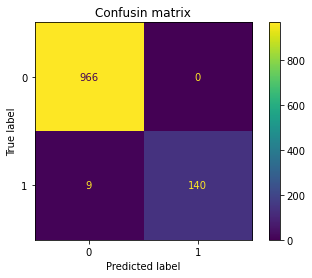

In [28]:
plot_confusion_matrix(mnb, X_test_dtm, y_test)
plt.title('Confusin matrix')
plt.show()

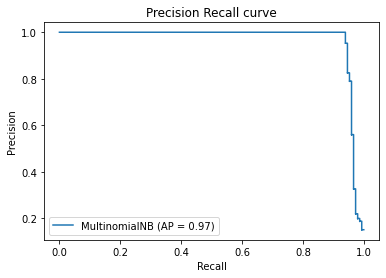

In [31]:
plot_precision_recall_curve(mnb,X_test_dtm, y_test)
plt.title('Precision Recall curve')
plt.show()

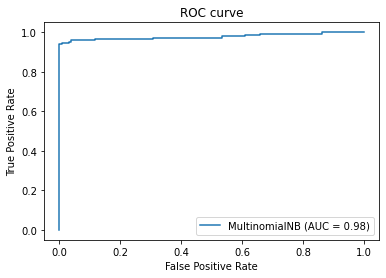

In [32]:
plot_roc_curve(mnb,X_test_dtm, y_test)
plt.title('ROC curve')
plt.show()

## Examining a model for further insight

In [39]:
# store the vocabulary of X_train
X_train_tokens = vectorizer.get_feature_names()

In [40]:
print('Length of vocabulary',len(X_train_tokens))

Length of vocabulary 7702


In [41]:
# Naive Bayes counts the number of times each token appears in each class
mnb.feature_count_

array([[ 0.,  0.,  1., ...,  1.,  1.,  0.],
       [ 8., 23.,  0., ...,  0.,  0.,  1.]])

In [43]:
# rows represent classes, columns represent tokens
mnb.feature_count_.shape

(2, 7702)

In [50]:
# number of times each token appears across all HAM messages
ham_token_count = mnb.feature_count_[0, :]

In [51]:
# number of times each token appears across all SPAM messages
spam_token_count = mnb.feature_count_[1, :]

In [60]:
tokens = pd.DataFrame(data={'tokens':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('tokens')

In [61]:
# examine 5 random DataFrame rows
tokens.sample(n=5, random_state=42)

,ham,spam
tokens,,
kalainar,1.0,0.0
rates,1.0,7.0
settling,1.0,0.0
wrench,1.0,0.0
bread,2.0,0.0


In [63]:
# Naive Bayes counts the number of observations in each class
print('Number of observations in each class',mnb.class_count_)

Number of observations in each class [3859.  598.]


Before we can calculate the "spamminess" of each token, we need to avoid dividing by zero and account for the class imbalance.

In [64]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens['ham']+1
tokens['spam'] = tokens['spam']+1

# examine 5 random DataFrame rows
tokens.sample(n=5, random_state=42)

,ham,spam
tokens,,
kalainar,2.0,1.0
rates,2.0,8.0
settling,2.0,1.0
wrench,2.0,1.0
bread,3.0,1.0


In [65]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens['ham'] / mnb.class_count_[0]
tokens['spam'] = tokens['spam'] / mnb.class_count_[1]

In [66]:
# examine 5 random DataFrame rows
tokens.sample(n=5, random_state=42)

,ham,spam
tokens,,
kalainar,0.000518,0.001672
rates,0.000518,0.013378
settling,0.000518,0.001672
wrench,0.000518,0.001672
bread,0.000777,0.001672


In [67]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=42)

,ham,spam,spam_ratio
tokens,,,
kalainar,0.000518,0.001672,3.226589
rates,0.000518,0.013378,25.812709
settling,0.000518,0.001672,3.226589
wrench,0.000518,0.001672,3.226589
bread,0.000777,0.001672,2.151059


In [68]:
# examine the DataFrame sorted by spam_ratio
tokens.sort_values(by=['spam_ratio'])

,ham,spam,spam_ratio
tokens,,,
gt,0.065820,0.001672,0.025406
lt,0.065561,0.001672,0.025507
he,0.044571,0.001672,0.037518
she,0.035501,0.001672,0.047103
lor,0.032392,0.001672,0.051625
...,...,...,...
guaranteed,0.000259,0.068562,264.580268
tone,0.000259,0.080268,309.752508
150p,0.000259,0.091973,354.924749


In [69]:

# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

96.79765886287625

## Tuning the vectorizer

***stop_words: string {'english'}, list, or None (default)**
* If 'english', a built-in stop word list for English is used.
* If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
* If None, no stop words will be used.

**ngram_range: tuple (min_n, max_n), default=(1, 1)**
* The lower and upper boundary of the range of n-values for different n-grams to be extracted.
* All values of n such that min_n <= n <= max_n will be used.

**max_df: float in range [0.0, 1.0] or int, default=1.0**
* When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
* If float, the parameter represents a proportion of documents.
* If integer, the parameter represents an absolute count.

**min_df: float in range [0.0, 1.0] or int, default=1**
* When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
* If float, the parameter represents a proportion of documents.
* If integer, the parameter represents an absolute count.



In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of training features',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing features',X_test.shape)
print('Shape of testing labels', y_test.shape)

Shape of training features (4457, 1)
Shape of training labels (4457,)
Shape of testing features (1115, 1)
Shape of testing labels (1115,)


## Model pipeline

In [111]:
text_feature = 'message'
text_transformer = CountVectorizer()

preprocessing = ColumnTransformer(transformers=[('vectorize', text_transformer, text_feature)])

model_pipe = Pipeline(steps=[('preprocess', preprocessing), ('model', MultinomialNB())])

## Train a pipeline 

In [112]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('vectorize',
                                                  CountVectorizer(),
                                                  'message')])),
                ('model', MultinomialNB())])

In [113]:
model_pipe.score(X_test, y_test)

0.9919282511210762

## Hyper-parameter tuning



In [117]:
# tuning parameters
param_grid = {'preprocess__vectorize__stop_words':['english']}
# model
gs_model = GridSearchCV(model_pipe, param_grid)
# training
gs_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('vectorize',
                                                                         CountVectorizer(),
                                                                         'message')])),
                                       ('model', MultinomialNB())]),
             param_grid={'preprocess__vectorize__stop_words': ['english']})

In [119]:
print('Best score',gs_model.best_score_)

Best score 0.9831712742774028


In [122]:
## Utility fn

def tuner(params):
    # tuning parameters
    param_grid = params
    # model
    gs_model = GridSearchCV(model_pipe, param_grid)
    # training
    gs_model.fit(X_train, y_train)
    print('Best score',gs_model.best_score_)
    return gs_model

In [125]:
tuner({'preprocess__vectorize__ngram_range':[(1,2)]})

Best score 0.9849652478949938


GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('vectorize',
                                                                         CountVectorizer(),
                                                                         'message')])),
                                       ('model', MultinomialNB())]),
             param_grid={'preprocess__vectorize__ngram_range': [(1, 2)]})

In [126]:
tuner({'preprocess__vectorize__min_df':[2]})

Best score 0.9845178239797073


GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('vectorize',
                                                                         CountVectorizer(),
                                                                         'message')])),
                                       ('model', MultinomialNB())]),
             param_grid={'preprocess__vectorize__min_df': [2]})

In [127]:
tuner({'preprocess__vectorize__max_df':[0.9]})

Best score 0.9833957411685365


GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('vectorize',
                                                                         CountVectorizer(),
                                                                         'message')])),
                                       ('model', MultinomialNB())]),
             param_grid={'preprocess__vectorize__max_df': [0.9]})